In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve
urlretrieve(url,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x289290ae590>)

In [4]:
data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)

In [5]:
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


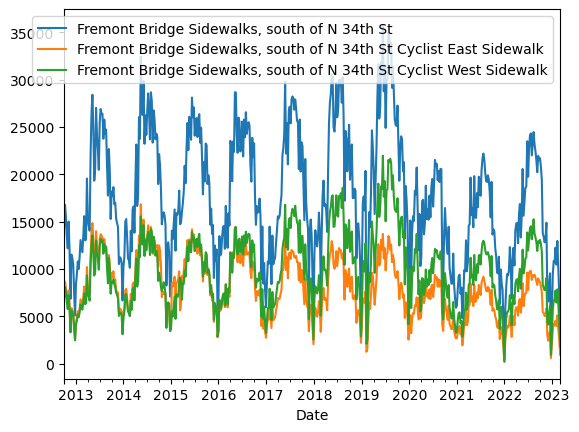

In [7]:
%matplotlib inline
data.resample('W').sum().plot();

C:\Users\ihbibani\AppData\Local\Temp\ipykernel_10216\176190058.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


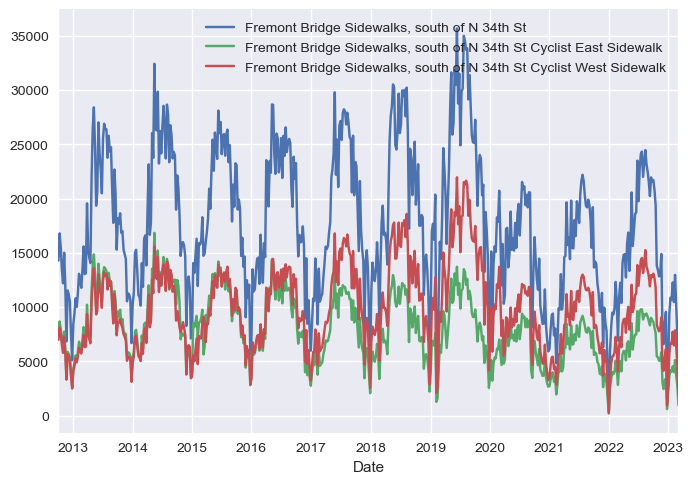

In [8]:
plt.style.use("seaborn")
data.resample('W').sum().plot();

(0.0, 1256022.05)

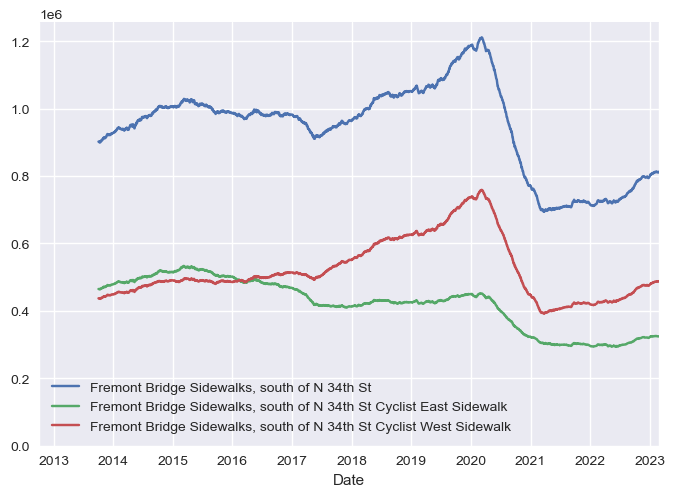

In [11]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

<Axes: xlabel='time'>

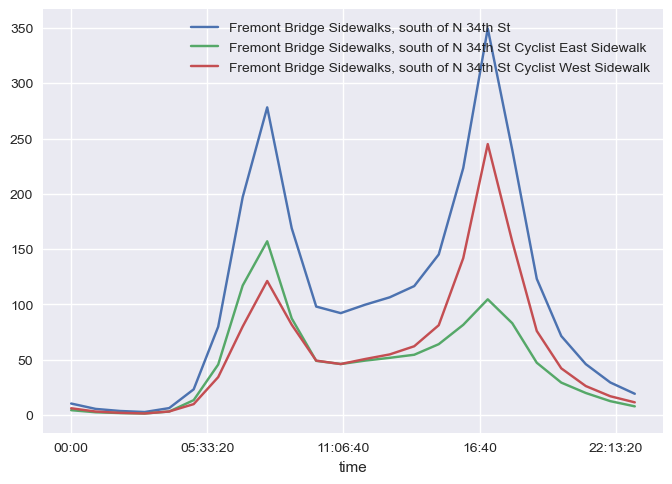

In [13]:
data.groupby(data.index.time).mean().plot()

In [14]:
data.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk'],
      dtype='object')

In [17]:
pivoted = data.pivot_table('Fremont Bridge Sidewalks, south of N 34th St',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<Axes: xlabel='time'>

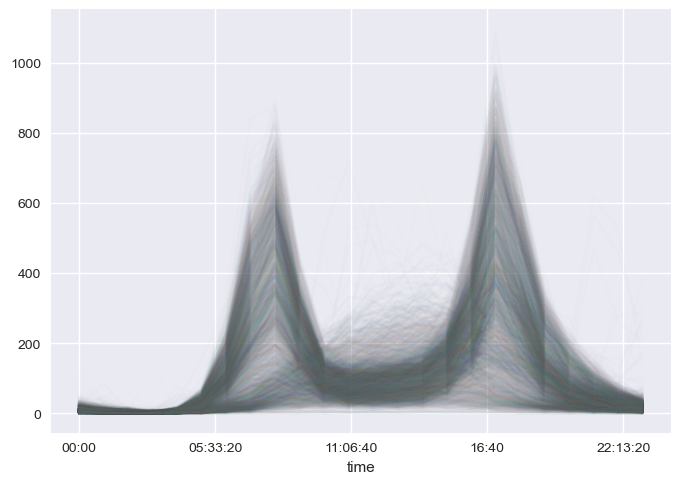

In [19]:
pivoted.plot(legend=False,alpha=0.01)